<a href="https://colab.research.google.com/github/nidhi880/drf-user/blob/master/EXPLORATORY_DATA_ANALYSIS_RETAIL_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Code By:Nidhi Agnihotri**

## **Task 3: Exploratory Data Analysis - Retail**

**Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore'. This task is about Exploratory Data Analysis,i.e Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.**

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import files
uploaded=files.upload()


Saving SampleSuperstore.csv to SampleSuperstore (1).csv


In [3]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Displaying Bottom 5 Rows
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
df.shape

(9994, 13)

In [6]:
#describing the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#To gain information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#To see the columns of the dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
#Analyzing duplicate values and adding them up
df.duplicated().sum()

17

In [11]:
#Return number of unique elements in the object
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [13]:
#Return DataFrame with duplicate rows removed and keeping the first data
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

In [15]:
#Counts the no of rows each feature has
df['Country'].value_counts()

United States    9944
Name: Country, dtype: int64

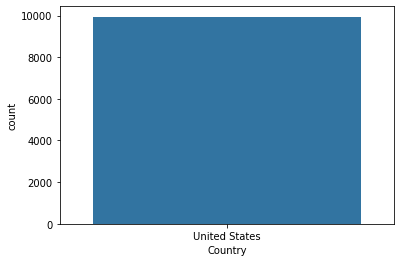

In [16]:
sns.countplot(x=df['Country'])

In [17]:
#Calculating Cost 
df['Cost']=df['Sales']-df['Profit']

#Calculating Profit%
df['Profit%']=(df['Profit']/df['Cost'])*100

In [18]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056


**MULTIVARIATE VISUALIZATIONS**

Text(0.5, 1.0, 'Correlation between the variables')

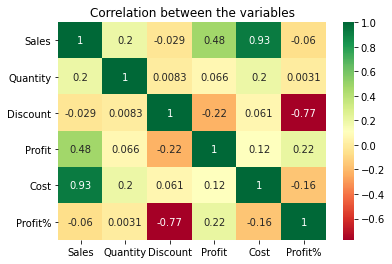

In [19]:
# correlation matrix and heatmap
dfcorr = df.corr()
sns.heatmap(dfcorr, annot=True, cmap='RdYlGn')
plt.title('Correlation between the variables')

**Finding modes of shipping products and observing which is more preferred mode of shipping?**

In [20]:
shipmodetypes = df.groupby('Ship Mode')
for i,dg in shipmodetypes:
    print(i)

First Class
Same Day
Second Class
Standard Class


In [21]:
df.groupby('Ship Mode').groups

{'First Class': [35, 36, 44, 45, 55, 56, 57, 58, 59, 60, 61, 69, 75, 76, 77, 79, 80, 84, 97, 119, 120, 121, 122, 123, 130, 131, 132, 151, 152, 153, 154, 155, 160, 189, 190, 191, 192, 193, 201, 202, 219, 220, 221, 222, 223, 224, 252, 253, 271, 272, 273, 274, 275, 293, 294, 295, 296, 297, 308, 316, 326, 327, 328, 329, 330, 349, 350, 351, 352, 353, 359, 360, 376, 381, 382, 388, 402, 421, 427, 433, 484, 485, 486, 487, 510, 511, 512, 522, 523, 524, 540, 541, 546, 547, 552, 563, 564, 565, 598, 610, ...], 'Same Day': [366, 367, 368, 369, 657, 658, 664, 683, 684, 746, 747, 792, 813, 814, 882, 959, 987, 1001, 1002, 1003, 1086, 1135, 1146, 1147, 1148, 1149, 1150, 1166, 1193, 1194, 1195, 1196, 1234, 1235, 1236, 1237, 1273, 1274, 1275, 1276, 1355, 1356, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1437, 1438, 1459, 1467, 1473, 1508, 1562, 1563, 1564, 1568, 1593, 1630, 1631, 1632, 1633, 1634, 1650, 1651, 1704, 1728, 1729, 1815, 1816, 1830, 1831, 1847, 1848, 1862, 1865, 1880, 18

In [22]:
df['Ship Mode'].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

Text(0.5, 1.0, 'Ship Mode Preference')

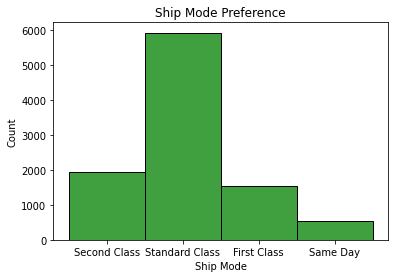

In [23]:
sns.histplot(x=df['Ship Mode'], color='g')
plt.title('Ship Mode Preference')

# **CUSTOMER SEGMENTS**

In [24]:
segmenttypes = df.groupby('Segment')
for i,dg in segmenttypes:
    print(i)

Consumer
Corporate
Home Office


In [25]:
df['Segment'].value_counts()

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

Text(0.5, 1.0, 'CUSTOMER SEGMENTS')

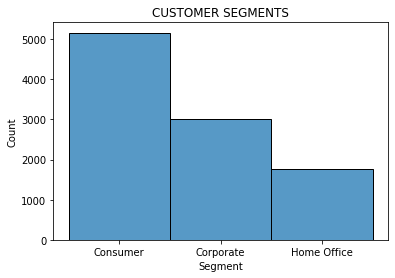

In [26]:
sns.histplot(x=df['Segment'])
plt.title('CUSTOMER SEGMENTS')

# **ANALYSIS BASED ON CATEGORY**

In [27]:
cat = df.groupby('Category')
for i,dg in cat:
    print(i)

Furniture
Office Supplies
Technology


Text(0.5, 1.0, 'CATEGORY OF PRODUCTS')

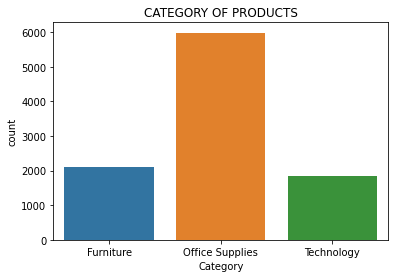

In [28]:
sns.countplot(x=df['Category'])
plt.title('CATEGORY OF PRODUCTS')

Text(0.5, 1.0, 'Region-wise Ordered Product Categories')

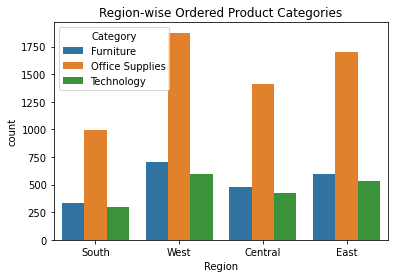

In [29]:
sns.countplot(x=df['Region'], hue=df['Category'])
plt.title('Region-wise Ordered Product Categories')

South region of the US orders less technology products and more office supplies, west orders more than any other region.

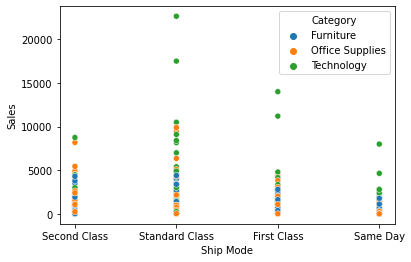

In [30]:
sns.scatterplot(x=df['Ship Mode'], y=df['Sales'], hue=df['Category'])

                      Profit        Sales
Category                                 
Furniture         18484.9459  740568.6663
Office Supplies  122196.0726  718256.0700
Technology       145416.5394  835774.6410


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Category-wise Profit and Sale')

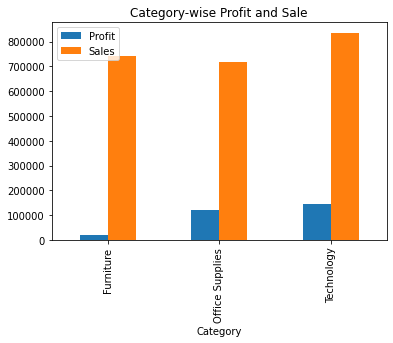

In [31]:
ds =df.groupby('Category')['Profit','Sales'].agg('sum')
print(ds)
ds.plot.bar()
plt.legend(loc='upper left')
plt.title('Category-wise Profit and Sale')

# **SUB CATEGORY WISE ANALYSIS**

In [32]:
subcatarr = []
subcat = df.groupby('Sub-Category')
for i,dg in subcat:
    print(i)
    subcatarr.append(i)

Accessories
Appliances
Art
Binders
Bookcases
Chairs
Copiers
Envelopes
Fasteners
Furnishings
Labels
Machines
Paper
Phones
Storage
Supplies
Tables


Text(0.5, 1.0, 'Quantity of different Sub-Categories Ordered')

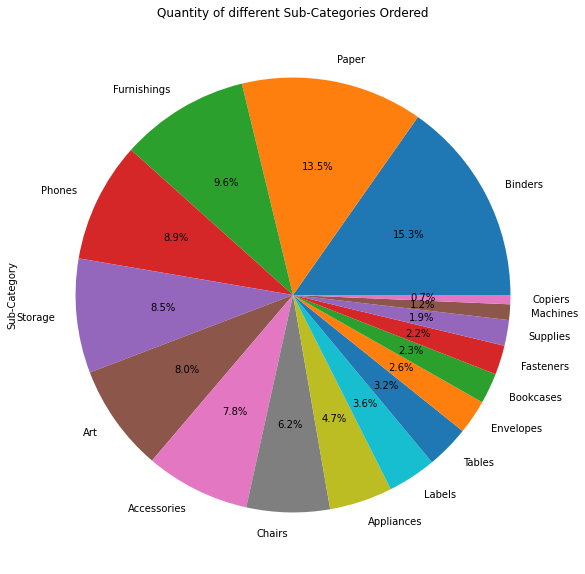

In [33]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Quantity of different Sub-Categories Ordered')

# **REGION WISE ANALYSIS**

In [34]:
regions = df.groupby('Region')
for i,dg in regions:
    print(i)


Central
East
South
West


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Region-wise Profit and Sales')

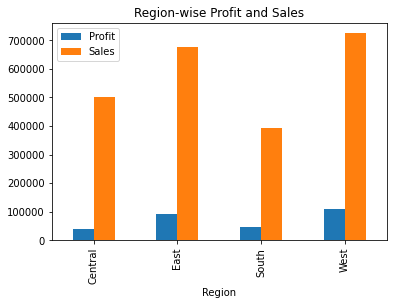

In [35]:
rw =df.groupby('Region')['Profit','Sales'].agg('sum')
rw.plot.bar()
plt.legend(loc='upper left')
plt.title('Region-wise Profit and Sales')

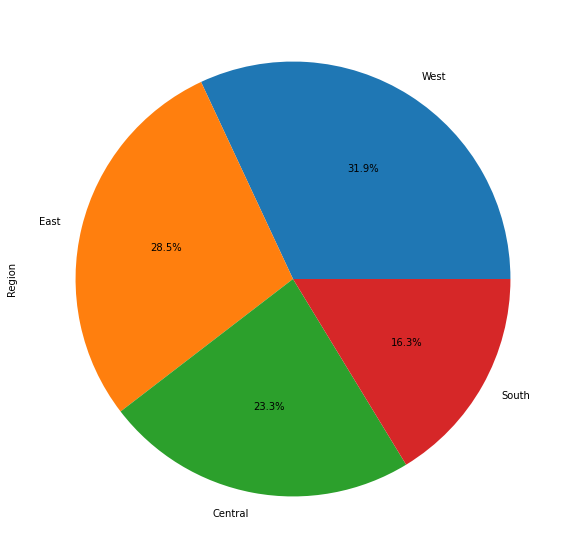

In [36]:
plt.figure(figsize=(10,10))
df['Region'].value_counts().plot.pie(autopct="%1.1f%%")

# **CITY WISE ANALYSIS**

In [37]:
city = []
cities = df.groupby('City')
for i,dg in cities:
    city.append(i)


In [38]:
city

['Aberdeen',
 'Abilene',
 'Akron',
 'Albuquerque',
 'Alexandria',
 'Allen',
 'Allentown',
 'Altoona',
 'Amarillo',
 'Anaheim',
 'Andover',
 'Ann Arbor',
 'Antioch',
 'Apopka',
 'Apple Valley',
 'Appleton',
 'Arlington',
 'Arlington Heights',
 'Arvada',
 'Asheville',
 'Athens',
 'Atlanta',
 'Atlantic City',
 'Auburn',
 'Aurora',
 'Austin',
 'Avondale',
 'Bakersfield',
 'Baltimore',
 'Bangor',
 'Bartlett',
 'Bayonne',
 'Baytown',
 'Beaumont',
 'Bedford',
 'Belleville',
 'Bellevue',
 'Bellingham',
 'Bethlehem',
 'Beverly',
 'Billings',
 'Bloomington',
 'Boca Raton',
 'Boise',
 'Bolingbrook',
 'Bossier City',
 'Bowling Green',
 'Boynton Beach',
 'Bozeman',
 'Brentwood',
 'Bridgeton',
 'Bristol',
 'Broken Arrow',
 'Broomfield',
 'Brownsville',
 'Bryan',
 'Buffalo',
 'Buffalo Grove',
 'Bullhead City',
 'Burbank',
 'Burlington',
 'Caldwell',
 'Camarillo',
 'Cambridge',
 'Canton',
 'Carlsbad',
 'Carol Stream',
 'Carrollton',
 'Cary',
 'Cedar Hill',
 'Cedar Rapids',
 'Champaign',
 'Chandler',
 

In [39]:
len(city)

531

In [40]:
df['City'].value_counts()

New York City    906
Los Angeles      734
Philadelphia     531
San Francisco    503
Seattle          424
                ... 
Lake Elsinore      1
Champaign          1
Aberdeen           1
Bartlett           1
Vacaville          1
Name: City, Length: 531, dtype: int64

In [41]:
df['City'].value_counts().min()

1

In [42]:
df['City'].value_counts().max()

906

In [43]:
df[df['City']=='New York City']

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
53,Standard Class,Corporate,United States,New York City,New York,East,Office Supplies,Fasteners,15.260,7,0.0,6.2566,9.0034,69.491525
54,Standard Class,Corporate,United States,New York City,New York,East,Technology,Phones,1029.950,5,0.0,298.6855,731.2645,40.845070
70,Standard Class,Consumer,United States,New York City,New York,East,Office Supplies,Binders,4.616,1,0.2,1.7310,2.8850,60.000000
96,Second Class,Home Office,United States,New York City,New York,East,Furniture,Furnishings,96.530,7,0.0,40.5426,55.9874,72.413793
110,Standard Class,Corporate,United States,New York City,New York,East,Furniture,Furnishings,41.960,2,0.0,10.9096,31.0504,35.135135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,First Class,Corporate,United States,New York City,New York,East,Technology,Phones,199.980,2,0.0,53.9946,145.9854,36.986301
9927,First Class,Corporate,United States,New York City,New York,East,Office Supplies,Storage,83.920,4,0.0,20.1408,63.7792,31.578947
9938,Standard Class,Corporate,United States,New York City,New York,East,Furniture,Furnishings,60.350,5,0.0,19.9155,40.4345,49.253731
9939,Standard Class,Corporate,United States,New York City,New York,East,Office Supplies,Supplies,35.520,4,0.0,9.9456,25.5744,38.888889


# **THANK YOU**